In [146]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
sample_space = {'Heads', 'Tails'}

In [148]:
probability_heads = 1 / len(sample_space)

In [149]:
probability_heads

0.5

In [150]:
is_head_or_tails = lambda outcome: outcome in sample_space

In [151]:
is_neither = lambda outcome: not is_head_or_tails(outcome)

In [152]:
is_heads = lambda outcome: outcome == 'Heads'

In [153]:
is_tails = lambda outcome: outcome == 'Tails'

In [154]:
is_head_or_tails.__name__ = 'is_head_or_tails'
is_neither.__name__ = 'is_neither'
is_heads.__name__ = 'is_heads'
is_tails.__name__ = 'is_tails'

In [155]:
get_matching_event = lambda event_condition, sample_space: set([outcome for outcome in sample_space if event_condition(outcome)])

In [156]:
event_conditions = [is_head_or_tails, is_heads, is_tails, is_neither]

In [157]:
for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f"Event: {event}")

Event Condition: is_head_or_tails
Event: {'Tails', 'Heads'}
Event Condition: is_heads
Event: {'Heads'}
Event Condition: is_tails
Event: {'Tails'}
Event Condition: is_neither
Event: set()


In [158]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

In [159]:
compute_probability(is_heads, sample_space)

0.5

In [160]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


In [161]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

In [162]:
sample_space_size = sum(weighted_sample_space.values())

In [163]:
assert sample_space_size == 5

In [164]:
event = get_matching_event(is_head_or_tails, weighted_sample_space)

In [165]:
event

{'Heads', 'Tails'}

In [166]:
event_size = sum([weighted_sample_space[outcome] for outcome in event])

In [167]:
assert event_size == 5

In [168]:
def compute_event_probability(event_condition, generic_sample_space):
    if isinstance(generic_sample_space, set):
        return len(get_matching_event(event_condition, generic_sample_space)) / len(generic_sample_space)
    total_sample_values = sum(generic_sample_space.values())
    matching_events = get_matching_event(event_condition, generic_sample_space)
    return sum([generic_sample_space[outcome] for outcome in matching_events]) / total_sample_values

In [169]:
compute_event_probability(is_tails, weighted_sample_space)

0.2

In [170]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


In [171]:
from itertools import product

In [172]:
possible_children = ['Boy', 'Girl']

In [173]:
sample_space = set(product(possible_children, repeat=4))

In [174]:
has_two_boys = lambda outcome: len([child for child in outcome if child == 'Boy']) == 2

In [175]:
compute_event_probability(has_two_boys, sample_space)

0.375

In [176]:
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [177]:
sample_space = set(product(range(1,7), repeat=6))

In [178]:
sample_space

{(3, 1, 4, 6, 4, 3),
 (6, 1, 3, 6, 3, 3),
 (2, 4, 2, 6, 4, 3),
 (2, 6, 4, 6, 3, 6),
 (3, 1, 1, 2, 2, 3),
 (2, 2, 5, 5, 5, 5),
 (1, 3, 6, 3, 6, 5),
 (6, 2, 3, 3, 2, 6),
 (6, 1, 4, 1, 2, 5),
 (2, 5, 2, 3, 3, 6),
 (6, 2, 3, 2, 3, 2),
 (2, 3, 3, 6, 3, 1),
 (1, 3, 6, 1, 3, 6),
 (1, 6, 1, 6, 4, 4),
 (4, 4, 4, 5, 5, 1),
 (3, 4, 2, 1, 6, 6),
 (3, 1, 6, 5, 2, 6),
 (3, 1, 6, 4, 3, 2),
 (3, 5, 3, 3, 2, 3),
 (3, 6, 5, 3, 3, 4),
 (6, 4, 4, 5, 5, 2),
 (4, 5, 6, 1, 6, 4),
 (5, 1, 3, 6, 4, 2),
 (3, 6, 3, 5, 5, 6),
 (3, 4, 2, 6, 6, 1),
 (6, 3, 5, 3, 1, 1),
 (1, 2, 6, 2, 2, 2),
 (1, 4, 2, 6, 5, 3),
 (6, 5, 4, 1, 5, 1),
 (2, 3, 5, 1, 3, 3),
 (1, 1, 1, 1, 6, 3),
 (1, 2, 2, 4, 1, 4),
 (3, 6, 4, 5, 6, 6),
 (6, 5, 3, 1, 5, 3),
 (4, 2, 5, 2, 1, 2),
 (1, 5, 3, 2, 6, 5),
 (2, 4, 1, 5, 3, 6),
 (2, 1, 2, 3, 5, 5),
 (3, 2, 4, 4, 5, 4),
 (2, 6, 1, 1, 6, 3),
 (5, 4, 5, 5, 6, 2),
 (2, 3, 4, 3, 6, 5),
 (6, 6, 6, 2, 2, 3),
 (3, 5, 4, 5, 1, 1),
 (4, 2, 4, 4, 4, 4),
 (4, 4, 5, 2, 3, 6),
 (5, 6, 5, 1, 3, 6),
 (5, 1, 2, 5,

In [179]:
has_sum_of_21 = lambda outcome: sum(outcome) == 21

In [180]:
compute_event_probability(has_sum_of_21, sample_space)

0.09284979423868313

In [181]:
from collections import defaultdict

In [182]:
weighted_sample_space = defaultdict(int)

In [183]:
for outcome in sample_space:
    weighted_sample_space[sum(outcome)] += 1

In [184]:
weighted_sample_space

defaultdict(int,
            {21: 4332,
             22: 4221,
             27: 1666,
             12: 456,
             24: 3431,
             19: 3906,
             18: 3431,
             20: 4221,
             23: 3906,
             26: 2247,
             28: 1161,
             15: 1666,
             17: 2856,
             13: 756,
             14: 1161,
             30: 456,
             16: 2247,
             25: 2856,
             9: 56,
             32: 126,
             31: 252,
             29: 756,
             11: 252,
             33: 56,
             10: 126,
             7: 6,
             35: 6,
             8: 21,
             34: 21,
             6: 1,
             36: 1})

In [185]:
assert weighted_sample_space[36] == 1
assert weighted_sample_space[6] == 1

In [186]:
num_combinations = weighted_sample_space[21]

In [187]:
num_combinations

4332

In [188]:
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

In [189]:
prob = compute_event_probability(lambda x: x == 21,
weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [190]:
is_in_interval = lambda number, minimum, maximum:  minimum <= number <= maximum

In [191]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)

In [192]:
prob

0.5446244855967078

In [193]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for outcome in product(['Heads', 'Tails'], repeat=num_flips):
        num_heads = len([flip for flip in outcome if flip == 'Heads'])
        weighted_sample_space[num_heads] += 1 
    return weighted_sample_space

In [194]:
weighted_sample_space = generate_coin_sample_space()

In [195]:
weighted_sample_space

defaultdict(int,
            {10: 1,
             9: 10,
             8: 45,
             7: 120,
             6: 210,
             5: 252,
             4: 210,
             3: 120,
             2: 45,
             1: 10,
             0: 1})

In [196]:
assert weighted_sample_space[10] == 1
assert weighted_sample_space[0] == 1
assert weighted_sample_space[9] == 10

In [197]:
x = range(10)
y = [2 * val for val in x]

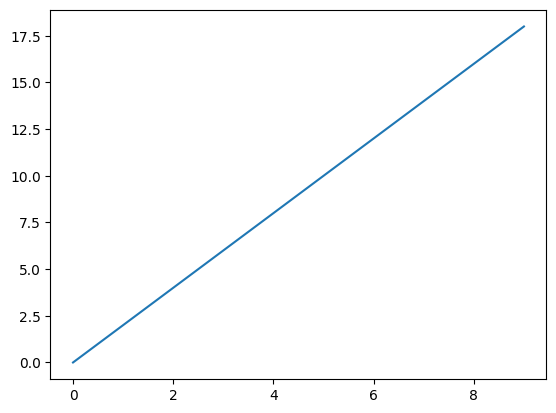

In [198]:
plt.plot(x, y)

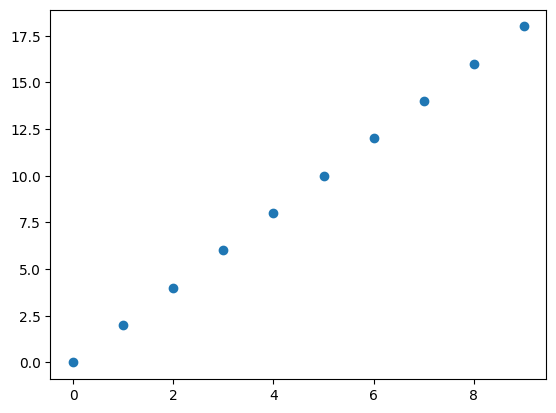

In [199]:
plt.scatter(x, y)

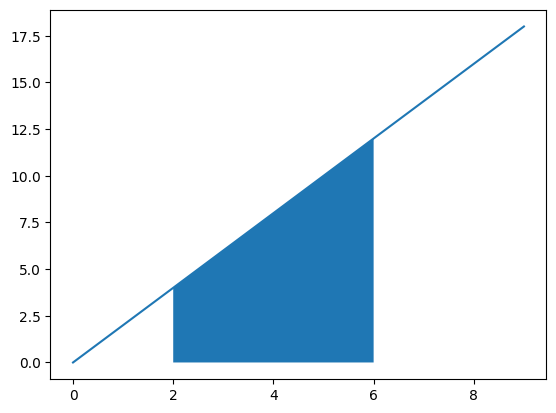

In [200]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)

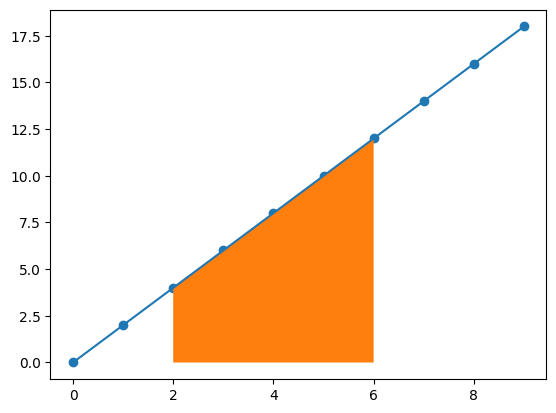

In [201]:
plt.plot(x, y)
plt.scatter(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)

Text(0, 0.5, 'Twice the value of x')

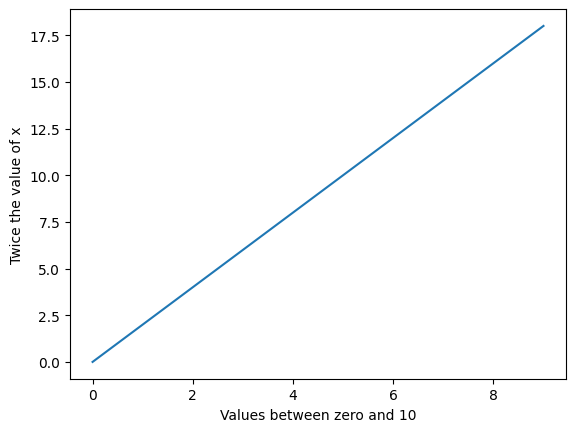

In [202]:
plt.plot(x, y)
plt.xlabel('Values between zero and 10')
plt.ylabel('Twice the value of x')

In [203]:
weighted_sample_space

defaultdict(int,
            {10: 1,
             9: 10,
             8: 45,
             7: 120,
             6: 210,
             5: 252,
             4: 210,
             3: 120,
             2: 45,
             1: 10,
             0: 1})

In [204]:
x_10_flips = weighted_sample_space.keys()
y_10_flips = weighted_sample_space.values()

Text(0, 0.5, 'Number of coin-flip combinations with x heads')

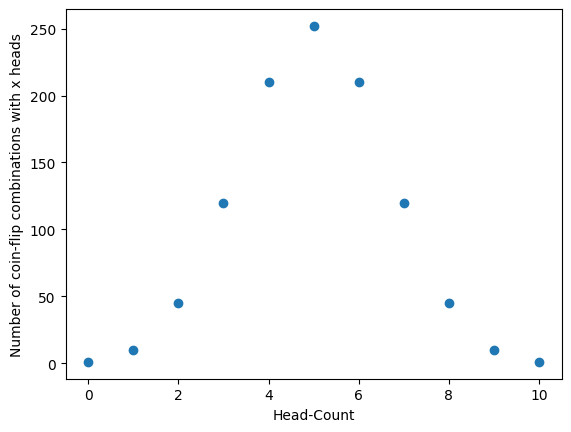

In [205]:
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-Count')
plt.ylabel('Number of coin-flip combinations with x heads')

In [206]:
sample_space_size = sum(weighted_sample_space.values())

In [207]:
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]

Text(0, 0.5, 'Probability')

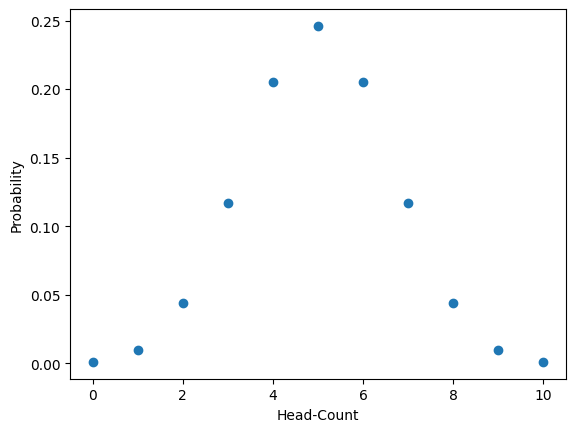

In [208]:
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-Count')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

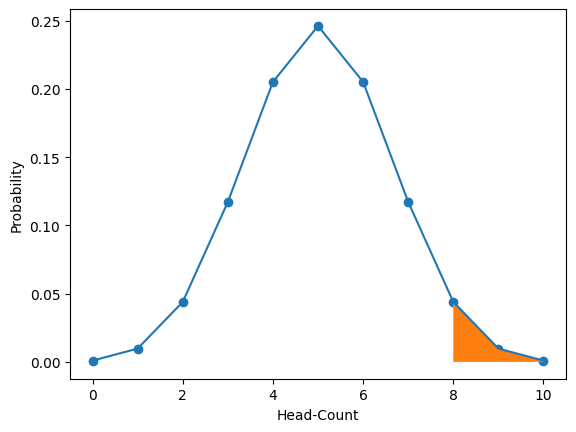

In [209]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.fill_between(x_10_flips, prob_x_10_flips, where=[is_in_interval(value, 8, 10) for value in x_10_flips])
plt.xlabel('Head-Count')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

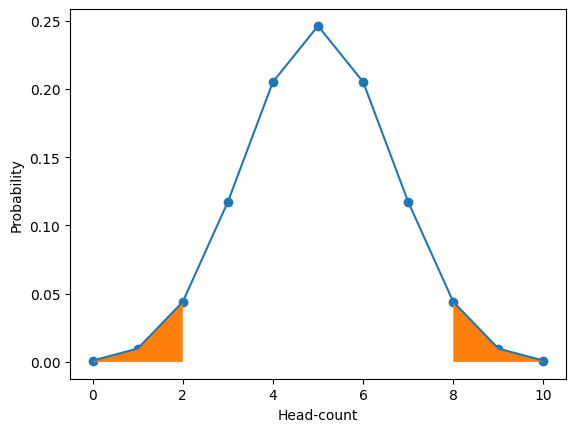

In [210]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')

In [211]:
weighted_sample_space_20_flips = defaultdict(int)
for outcome in product(['Heads', 'Tails'], repeat=20):
    weighted_sample_space_20_flips[len([flip for flip in outcome if flip == 'Heads'])] += 1
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

In [212]:
weighted_sample_space_20_flips

defaultdict(int,
            {20: 1,
             19: 20,
             18: 190,
             17: 1140,
             16: 4845,
             15: 15504,
             14: 38760,
             13: 77520,
             12: 125970,
             11: 167960,
             10: 184756,
             9: 167960,
             8: 125970,
             7: 77520,
             6: 38760,
             5: 15504,
             4: 4845,
             3: 1140,
             2: 190,
             1: 20,
             0: 1})

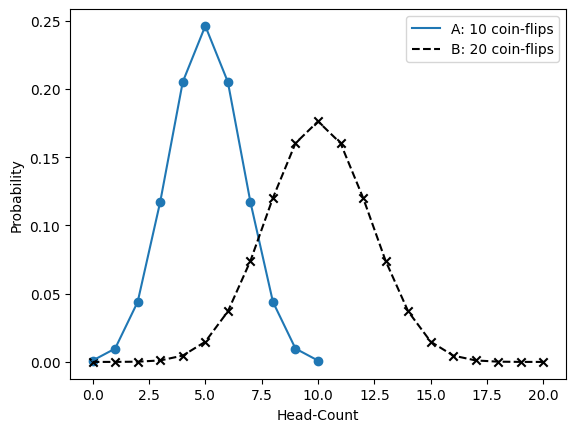

In [213]:
plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, marker='x', color='k')
plt.legend()

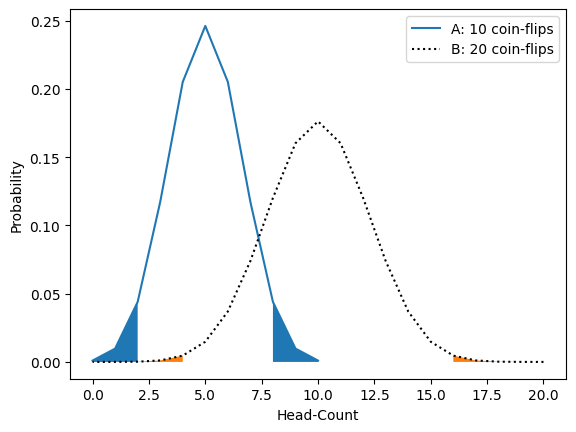

In [214]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':',
label='B: 20 coin-flips')
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)
plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.legend()

In [215]:
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

In [216]:
x_10_frequencies

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

In [217]:
x_20_frequencies

[1.0,
 0.95,
 0.9,
 0.85,
 0.8,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.5,
 0.45,
 0.4,
 0.35,
 0.3,
 0.25,
 0.2,
 0.15,
 0.1,
 0.05,
 0.0]

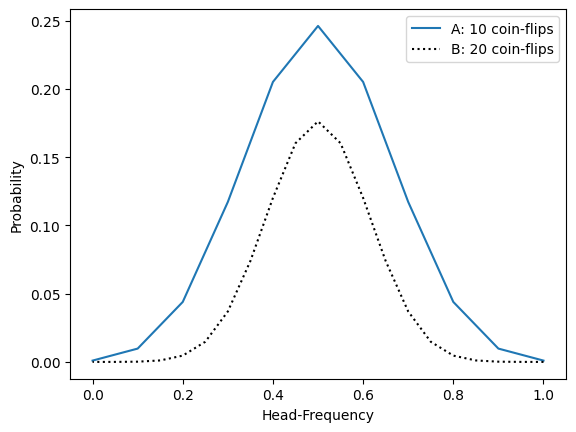

In [218]:
plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, label='B: 20 coin-flips', linestyle=':', color='k')
plt.legend()

In [219]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

In [220]:
relative_likelihood_10

[0.009765625,
 0.09765625,
 0.439453125,
 1.171875,
 2.05078125,
 2.4609375,
 2.05078125,
 1.171875,
 0.439453125,
 0.09765625,
 0.009765625]

In [221]:
relative_likelihood_20

[1.9073486328125e-05,
 0.0003814697265625,
 0.00362396240234375,
 0.0217437744140625,
 0.09241104125976562,
 0.29571533203125,
 0.739288330078125,
 1.47857666015625,
 2.4026870727539062,
 3.203582763671875,
 3.5239410400390625,
 3.203582763671875,
 2.4026870727539062,
 1.47857666015625,
 0.739288330078125,
 0.29571533203125,
 0.09241104125976562,
 0.0217437744140625,
 0.00362396240234375,
 0.0003814697265625,
 1.9073486328125e-05]

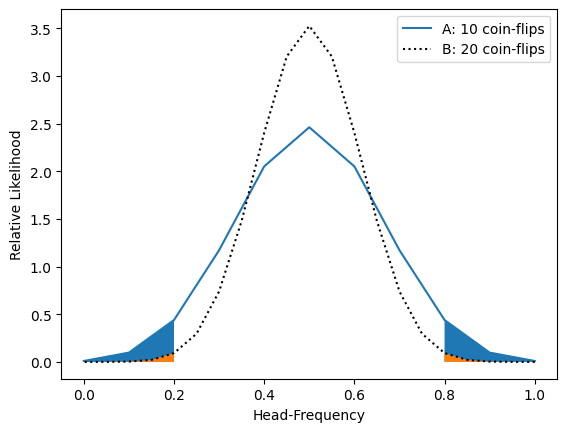

In [222]:
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, label='B: 20 coin-flips', linestyle=':', color='k')
plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)
plt.legend()

In [223]:
def frequency_heads(coin_flip_sequence):
    return sum([flip for flip in coin_flip_sequence if flip==1]) / len(coin_flip_sequence)

In [224]:
np.random.seed(0)
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
frequency_heads(coin_flips)

0.8

In [225]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

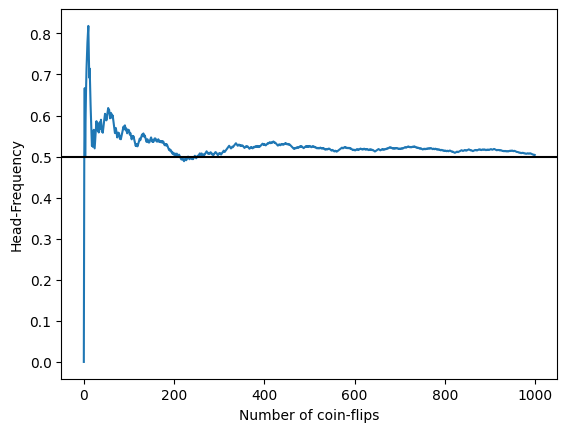

In [226]:
plt.xlabel('Number of coin-flips')
plt.ylabel('Head-Frequency')
plt.plot(range(1000), frequencies)
plt.axhline(0.5, color='k')

In [227]:
np.random.seed(0)
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
head_count

7

In [228]:
np.random.seed(0)
head_count = np.random.binomial(1000, .7)
frequency = head_count / 1000
frequency

0.697

In [229]:
np.random.seed(0)
assert np.random.binomial(1000, .7) == 697
for i in range(1, 6):
    head_count = np.random.binomial(1000, .7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == .7:
        print('Frequency equal probability')

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equal probability
Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [230]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, .7, 500)

In [231]:
head_count_array

array([697, 690, 700, 707, 702, 699, 723, 670, 702, 713, 721, 689, 711,
       697, 717, 691, 731, 697, 722, 728, 695, 697, 688, 696, 679, 687,
       696, 676, 702, 695, 692, 666, 668, 713, 691, 691, 698, 717, 683,
       680, 702, 705, 715, 693, 675, 693, 726, 706, 691, 718, 705, 721,
       697, 716, 699, 708, 680, 686, 703, 692, 694, 684, 679, 707, 722,
       718, 711, 719, 685, 670, 710, 715, 679, 692, 712, 720, 711, 682,
       732, 694, 715, 689, 719, 713, 698, 710, 707, 689, 701, 726, 703,
       679, 721, 697, 699, 698, 711, 719, 724, 731, 695, 679, 703, 697,
       705, 686, 682, 718, 681, 708, 712, 677, 693, 693, 726, 705, 711,
       671, 713, 717, 730, 698, 712, 674, 689, 666, 697, 688, 695, 685,
       720, 671, 688, 689, 696, 716, 706, 699, 727, 698, 692, 706, 702,
       699, 715, 717, 700, 683, 690, 682, 687, 703, 673, 696, 696, 692,
       710, 718, 690, 716, 721, 709, 694, 697, 687, 733, 696, 684, 709,
       713, 726, 695, 705, 709, 723, 685, 693, 675, 712, 704, 69

In [232]:
frequency_array = head_count_array / 1000

In [233]:
frequency_array

array([0.697, 0.69 , 0.7  , 0.707, 0.702, 0.699, 0.723, 0.67 , 0.702,
       0.713, 0.721, 0.689, 0.711, 0.697, 0.717, 0.691, 0.731, 0.697,
       0.722, 0.728, 0.695, 0.697, 0.688, 0.696, 0.679, 0.687, 0.696,
       0.676, 0.702, 0.695, 0.692, 0.666, 0.668, 0.713, 0.691, 0.691,
       0.698, 0.717, 0.683, 0.68 , 0.702, 0.705, 0.715, 0.693, 0.675,
       0.693, 0.726, 0.706, 0.691, 0.718, 0.705, 0.721, 0.697, 0.716,
       0.699, 0.708, 0.68 , 0.686, 0.703, 0.692, 0.694, 0.684, 0.679,
       0.707, 0.722, 0.718, 0.711, 0.719, 0.685, 0.67 , 0.71 , 0.715,
       0.679, 0.692, 0.712, 0.72 , 0.711, 0.682, 0.732, 0.694, 0.715,
       0.689, 0.719, 0.713, 0.698, 0.71 , 0.707, 0.689, 0.701, 0.726,
       0.703, 0.679, 0.721, 0.697, 0.699, 0.698, 0.711, 0.719, 0.724,
       0.731, 0.695, 0.679, 0.703, 0.697, 0.705, 0.686, 0.682, 0.718,
       0.681, 0.708, 0.712, 0.677, 0.693, 0.693, 0.726, 0.705, 0.711,
       0.671, 0.713, 0.717, 0.73 , 0.698, 0.712, 0.674, 0.689, 0.666,
       0.697, 0.688,

In [234]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
max_freq - min_freq

0.07699999999999996

In [235]:
frequency_counts = defaultdict(int)

In [236]:
for frequency in frequency_array:
    frequency_counts[frequency] += 1

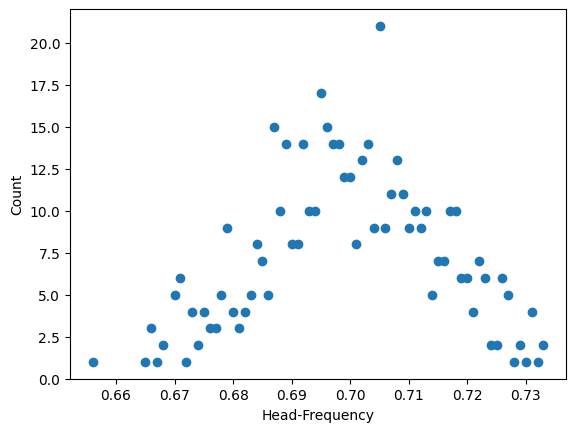

In [237]:
frequencies = frequency_counts.keys()
counts = [frequency_counts[freq] for freq in frequencies]
plt.xlabel('Head-Frequency')
plt.ylabel('Count')
plt.scatter(frequencies, counts)

Text(0, 0.5, 'Count')

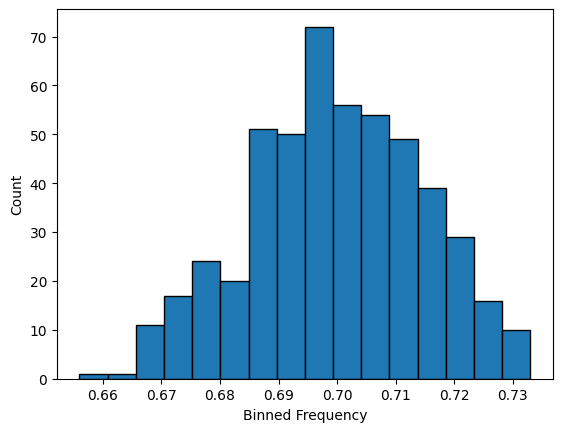

In [238]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')

In [239]:
def output_bin_converage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains " f"{count} element{'' if count == 1 else 's'}"))

In [240]:
output_bin_converage(0)

The bin for frequency range 0.656 - 0.6608125 contains 1 element


In [241]:
output_bin_converage(5)

The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [242]:
counts.argmax()

8

In [243]:
output_bin_converage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


Text(0, 0.5, 'Relative Likelihood')

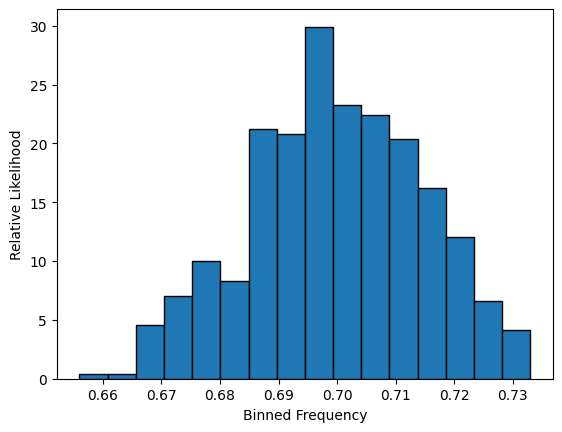

In [244]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

In [245]:
bin_width = bin_edges[1] - bin_edges[0]

In [246]:
bin_width

0.004812499999999997

In [247]:
bin_width*sum(likelihoods) == 1.

False

In [248]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [249]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [250]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index: end_index + 1].sum() * bin_width
        range_start, range_end = bin_edges[start_index], bin_edges[end_index]
        range_string = f"{range_start:.6f} - {range_end:.6f}"
        print((f"The frequency range {range_string} represents a " f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

In [251]:
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.689688 - 0.704125 represents a 46.40% confidence interval
The frequency range 0.684875 - 0.708937 represents a 66.40% confidence interval
The frequency range 0.680063 - 0.713750 represents a 78.20% confidence interval
The frequency range 0.675250 - 0.718562 represents a 88.80% confidence interval
The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

In [252]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.697857 - 0.700429 represents a 11.02% confidence interval
The frequency range 0.697000 - 0.701286 represents a 13.71% confidence interval
The frequency range 0.696143 - 0.702143 represents a 19.20% confidence interval
The frequency range 0.695286 - 0.703000 represents a 21.84% confidence interval
The frequency range 0.694429 - 0.703857 represents a 27.03% confidence interval
The frequency range 0.693571 - 0.704714 represents a 32.14% confidence interval
The frequency range 0.692714 - 0.705571 represents a 37.08% confidence interval
The frequency range 0.691857 - 0.706429 represents a 41.79% confidence interval
The frequency range 0.691000 - 0.707286 represents a 44.16% confidence interval
The frequency range 0.690143 - 0.708143 represents a 46.40% confidence interval
The frequency range 0.689286 - 0.709000 represents a 50.76% confidence interval
The frequency range 0.688429 - 0.709857 represents a 55.00% confidence interval
The frequency range 0.687571 - 0.710714 

Text(0, 0.5, 'Relative Likelihood')

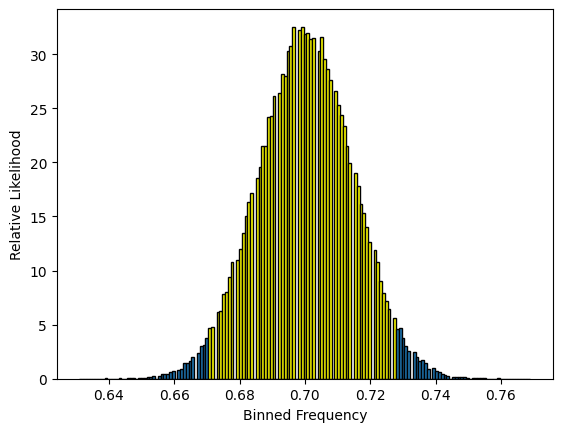

In [253]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

The frequency range 0.699561 - 0.699916 represents a 9.07% confidence interval
The frequency range 0.699442 - 0.700035 represents a 13.64% confidence interval
The frequency range 0.699324 - 0.700153 represents a 18.07% confidence interval
The frequency range 0.699205 - 0.700272 represents a 22.56% confidence interval
The frequency range 0.699087 - 0.700390 represents a 26.90% confidence interval
The frequency range 0.698968 - 0.700509 represents a 31.14% confidence interval
The frequency range 0.698850 - 0.700627 represents a 35.38% confidence interval
The frequency range 0.698731 - 0.700746 represents a 39.49% confidence interval
The frequency range 0.698613 - 0.700864 represents a 43.47% confidence interval
The frequency range 0.698494 - 0.700983 represents a 47.33% confidence interval
The frequency range 0.698376 - 0.701101 represents a 50.73% confidence interval
The frequency range 0.698257 - 0.701220 represents a 54.29% confidence interval
The frequency range 0.698139 - 0.701338 r

Text(0, 0.5, 'Relative Likelihood')

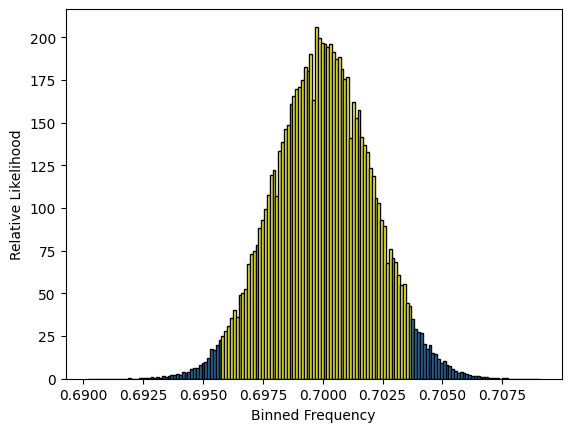

In [254]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

In [255]:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

In [256]:
bin_width = bin_edges[1] - bin_edges[0]

In [257]:
compute_high_confidence_interval(likelihoods=likelihoods, bin_width=bin_width)

The frequency range 0.699561 - 0.699916 represents a 9.07% confidence interval
The frequency range 0.699442 - 0.700035 represents a 13.64% confidence interval
The frequency range 0.699324 - 0.700153 represents a 18.07% confidence interval
The frequency range 0.699205 - 0.700272 represents a 22.56% confidence interval
The frequency range 0.699087 - 0.700390 represents a 26.90% confidence interval
The frequency range 0.698968 - 0.700509 represents a 31.14% confidence interval
The frequency range 0.698850 - 0.700627 represents a 35.38% confidence interval
The frequency range 0.698731 - 0.700746 represents a 39.49% confidence interval
The frequency range 0.698613 - 0.700864 represents a 43.47% confidence interval
The frequency range 0.698494 - 0.700983 represents a 47.33% confidence interval
The frequency range 0.698376 - 0.701101 represents a 50.73% confidence interval
The frequency range 0.698257 - 0.701220 represents a 54.29% confidence interval
The frequency range 0.698139 - 0.701338 r

(47, 114)

In [258]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [259]:
red_card_count

44

In [260]:
black_card_count = total_cards - red_card_count

In [261]:
assert red_card_count != black_card_count

In [262]:
weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}

In [263]:
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

In [264]:
prob_red

0.8461538461538461

In [265]:
assert prob_red == red_card_count / total_cards

In [266]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [267]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


In [268]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

In [269]:
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

In [270]:
bin_width = bin_edges[1] - bin_edges[0]

In [271]:
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.845862 - 0.846143 represents a 9.00% confidence interval
The frequency range 0.845768 - 0.846236 represents a 13.87% confidence interval
The frequency range 0.845674 - 0.846330 represents a 18.59% confidence interval
The frequency range 0.845581 - 0.846424 represents a 22.47% confidence interval
The frequency range 0.845487 - 0.846517 represents a 27.02% confidence interval
The frequency range 0.845394 - 0.846611 represents a 31.61% confidence interval
The frequency range 0.845300 - 0.846705 represents a 35.54% confidence interval
The frequency range 0.845206 - 0.846798 represents a 39.44% confidence interval
The frequency range 0.845113 - 0.846892 represents a 43.74% confidence interval
The frequency range 0.845019 - 0.846986 represents a 47.40% confidence interval
The frequency range 0.844925 - 0.847079 represents a 50.94% confidence interval
The frequency range 0.844832 - 0.847173 represents a 54.64% confidence interval
The frequency range 0.844738 - 0.847266 r

In [272]:
np.random.seed(0)
card_deck = [0, 0, 1, 1]
np.random.shuffle(card_deck)
card_deck

[1, 1, 0, 0]

In [273]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_card = np.random.permutation(unshuffled_deck)
shuffled_card

array([0, 0, 1, 1])

In [274]:
import itertools

In [275]:
for permutation in itertools.permutations(unshuffled_deck):
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 0, 1)
(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 0, 1)
(0, 1, 1, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 0, 1)
(0, 0, 1, 1)
(0, 0, 1, 1)
(0, 1, 1, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 0, 1)
(0, 0, 1, 1)
(0, 0, 1, 1)


In [276]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1
for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [277]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)

In [278]:
prob

0.16666666666666666

In [279]:
red_cards = 26 * [1]
black_cards = 26 * [0]

In [280]:
unshuffled_deck = red_cards + black_cards

In [281]:
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)

In [282]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        print(f"Deck is in order at index {i}")
        break
print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Deck is in order at index 0
Stopping the game at index 0.
The next card in the deck is red.
We have won!


In [284]:
shuffled_deck[1]

1